In [7]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

# 資料表公司合併 US

In [8]:
for i in range(2015,2020):
    us = pd.read_csv("competitor_df/company/cpc_us_{}.csv".format(i))
    us_a = pd.read_csv("competitor_df/company/cpc_us_{}.csv".format(i+1))
    
    us.rename(columns = {'cpc':'cpc_{}'.format(i), 'country':'country_{}'.format(i)}, inplace = True)
    us_a.rename(columns = {'cpc':'cpc_{}'.format(i+1), 'country':'country_{}'.format(i+1)}, inplace = True)
    
    if i != 2015:
        us_all = pd.merge(us_all,us_a, on=['company'],how='outer')
    else:
        us_all = pd.merge(us,us_a, on=['company'],how='outer')
    
    
    

In [9]:
us_all

,company,cpc_2015,country_2015,cpc_2016,country_2016,cpc_2017,country_2017,cpc_2018,country_2018,cpc_2019,country_2019,cpc_2020,country_2020
0,Intel,0.341743,0.225982,0.358004,0.355784,0.259746,0.278684,0.343779,0.268343,0.461619,0.304417,0.607434,0.559730
1,Ericsson,0.637265,0.348837,0.673086,0.414100,0.413413,0.199208,0.418687,0.200094,0.595782,0.198698,NaN,NaN
2,Qualcomm,0.605561,0.350981,0.521481,0.338823,0.369315,0.181205,0.402870,0.175903,0.576785,0.222809,1.449969,1.235697
3,Cisco Systems,0.739123,0.618974,0.786754,0.747794,0.497291,0.472250,0.480964,0.421779,0.582799,0.373297,2.544320,2.438643
4,Afero,0.739174,0.630410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IBM,0.601529,0.647998,0.630933,0.750641,0.266938,0.337349,0.255590,0.354751,0.242390,0.313657,1.295340,1.421247
6,Microsoft,0.613041,0.586912,0.895043,0.839824,0.482190,0.470661,0.440362,0.412801,0.420249,0.378882,3.248623,3.282251
7,Convida Wireless LLC,0.916062,0.658039,1.328907,1.111789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Apple,0.966883,0.646072,NaN,NaN,0.811379,0.695625,0.605123,0.431241,0.722589,0.413501,NaN,NaN
9,Nokia,1.064059,0.754441,1.394849,1.183638,0.738743,0.557917,0.628168,0.412338,0.911473,0.585204,5.787408,5.554952


In [10]:
cpc_ls = list(-us_all[us_all.company=="LG Electronics"].iloc[:,[1,3,5,7,9,11]].values[0])
country_ls = list(-us_all[us_all.company=="LG Electronics"].iloc[:,[2,4,6,8,10,12]].values[0])
year = list(range(2015,2021))

In [11]:
df = pd.DataFrame((zip(year, cpc_ls, country_ls)), columns = ['year','cpc', 'country'])

In [12]:
df

,year,cpc,country
0,2015,-1.037304,-0.902106
1,2016,-0.813980,-0.677922
2,2017,-0.546471,-0.485734
3,2018,-0.625580,-0.478541
4,2019,-0.294252,-0.266057
5,2020,-0.890336,-0.867424


# Scatter plot

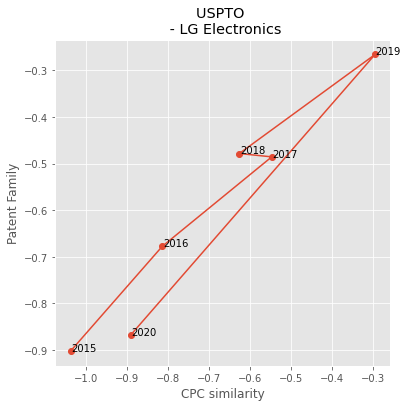

In [14]:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')

plt.plot("cpc", "country", data=df, linestyle='-', marker='o')
# plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)


plt.title("USPTO \n - LG Electronics")
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")


for i, txt in enumerate(df.year):
    plt.text(df.cpc[i]+0.0015, df.country[i],txt)



plt.show()